<a href="https://colab.research.google.com/github/jaimeisaac2020/Python-analsisis-basicos/blob/mi-github/graficas_categoricas_Python_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy.stats
import pandas as pd

In [14]:
import matplotlib
import matplotlib.pyplot as plt

import pandas.plotting

from IPython import display
from ipywidgets import interact, widgets

In [3]:

import re
import mailbox
import csv

In [5]:
smoking=pd.read_csv('whickham.csv')
smoking.head(10)

,outcome,smoker,age
0,Alive,Yes,23
1,Alive,Yes,18
2,Dead,Yes,71
3,Alive,No,67
4,Alive,No,64
5,Alive,Yes,38
6,Alive,Yes,45
7,Dead,No,76
8,Alive,No,28
9,Alive,No,27


In [6]:
smoking['ageGroup']=pd.cut(smoking.age,[0,30,40,53,64],
                           labels=['0-30','30-40','40-53','53-64'])

In [7]:
smoking.head()

,outcome,smoker,age,ageGroup
0,Alive,Yes,23,0-30
1,Alive,Yes,18,0-30
2,Dead,Yes,71,NaN
3,Alive,No,67,NaN
4,Alive,No,64,53-64


In [10]:
bysmoker=smoking.groupby('smoker').outcome.value_counts(normalize=True)

In [11]:
bysmoker

smoker  outcome
No      Alive      0.685792
        Dead       0.314208
Yes     Alive      0.761168
        Dead       0.238832
Name: outcome, dtype: float64

In [12]:
byage=smoking.groupby(['ageGroup','smoker']).outcome.value_counts(normalize=True)

In [13]:
byage

ageGroup  smoker  outcome
0-30      No      Alive      0.981818
                  Dead       0.018182
          Yes     Alive      0.975610
                  Dead       0.024390
30-40     No      Alive      0.955224
                  Dead       0.044776
          Yes     Alive      0.940678
                  Dead       0.059322
40-53     No      Alive      0.876106
                  Dead       0.123894
          Yes     Alive      0.802395
                  Dead       0.197605
53-64     No      Alive      0.669291
                  Dead       0.330709
          Yes     Alive      0.580645
                  Dead       0.419355
Name: outcome, dtype: float64

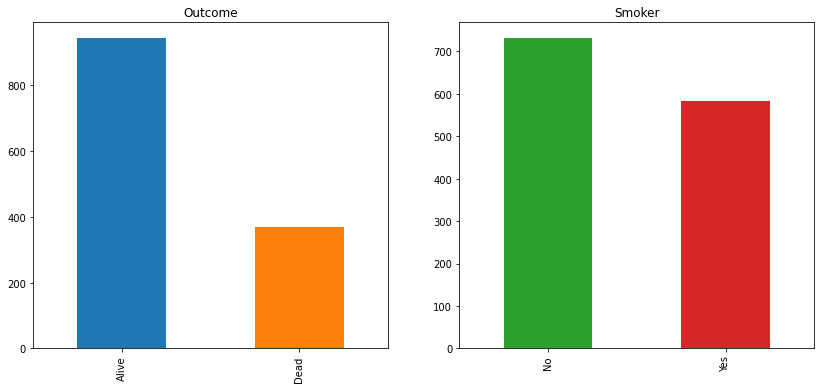

In [19]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
smoking.outcome.value_counts().plot(kind='bar',color=['C0','C1'])
plt.title('Outcome')
plt.subplot(1,2,2)
smoking.smoker.value_counts().plot(kind='bar',color=['C2','C3'])
plt.title('Smoker')
plt.show()

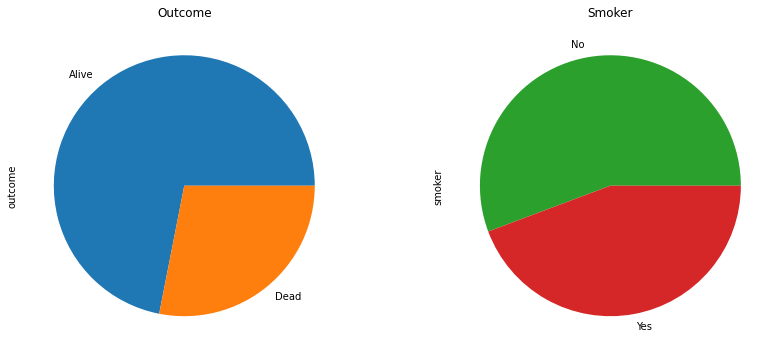

In [20]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
smoking.outcome.value_counts().plot(kind='pie',colors=['C0','C1'])
plt.title('Outcome')
plt.subplot(1,2,2)
smoking.smoker.value_counts().plot(kind='pie',colors=['C2','C3'])
plt.title('Smoker')
plt.show()

In [21]:
bysmoker

smoker  outcome
No      Alive      0.685792
        Dead       0.314208
Yes     Alive      0.761168
        Dead       0.238832
Name: outcome, dtype: float64

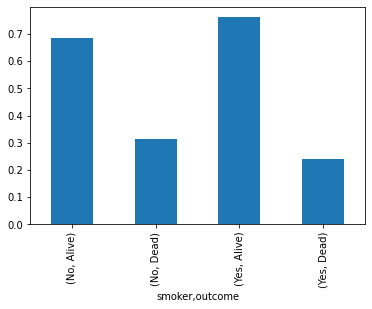

In [22]:
bysmoker.plot(kind='bar')

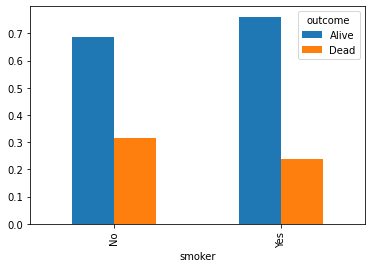

In [27]:
bysmoker.unstack().plot(kind='bar',stacked=False)

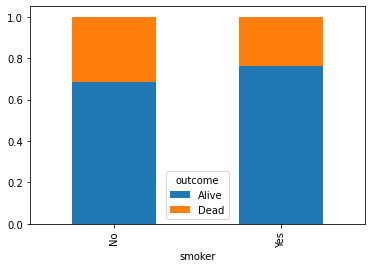

In [28]:
bysmoker.unstack().plot(kind='bar',stacked=True)

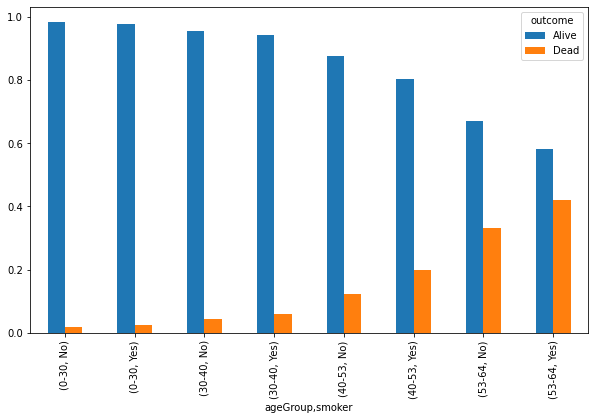

In [30]:
byage.unstack().plot(kind='bar',stacked=False,figsize=(10,6))

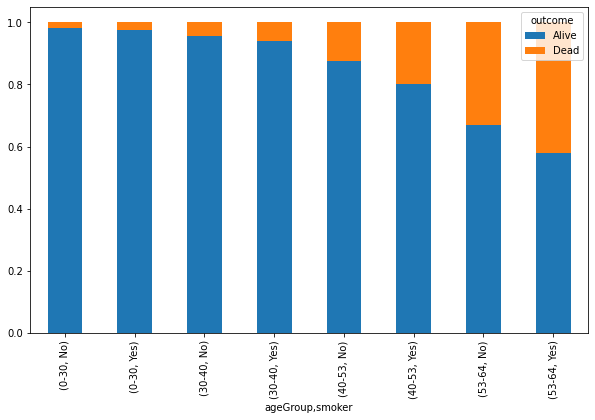

In [31]:
byage.unstack().plot(kind='bar',stacked=True,figsize=(10,6))

In [32]:

byage.unstack().drop("Dead",axis=1).unstack()

outcome      Alive          
smoker          No       Yes
ageGroup                    
0-30      0.981818  0.975610
30-40     0.955224  0.940678
40-53     0.876106  0.802395
53-64     0.669291  0.580645

In [34]:
byage2 = byage.unstack().drop("Dead",axis=1).unstack()

byage2.columns = ["No", "Yes"]
byage2.columns.name = "smoker"

In [35]:
byage2

smoker,No,Yes
ageGroup,,
0-30,0.981818,0.975610
30-40,0.955224,0.940678
40-53,0.876106,0.802395
53-64,0.669291,0.580645


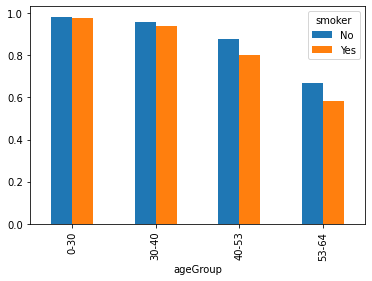

In [36]:
byage2.plot(kind='bar')